In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
# Read the data
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter ='\t')

In [3]:
df

,Review,Liked
0,Wow... Loved this place. 25 times,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# Text processing

In [4]:
# Clean the text by removing any extra characters 
import re # tool for cleaning text
import nltk # library to perform NLP
nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # Stemming

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
corpus = [] # Build a new list for all the words from all the reviews
for i in range (0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i] )
    review = review.lower()
    review = review.split()
    ps =PorterStemmer()
    review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [6]:
corpus[0:5]

['wow love place time',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

# Features Extraction using bag of words

In [7]:
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)# We restrict the words to 1500 which keeps the most frequent words

In [8]:
X = cv.fit_transform(corpus).toarray()# independent variables

In [9]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
X.shape

(1000, 1500)

* We have 1000 reviews (rows) and 1500 columns (Features)

In [11]:
y=df.iloc[:,-1].values

In [12]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

# Modeling

### Naive Bayes Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [14]:
#Naive Bayes Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
classifier=GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [15]:
# Predicting test set
y_pred = classifier.predict(X_test)

In [16]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 500 points : 158


In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics
import seaborn as sns

In [18]:
#Evaluating the logitsic regression Results (Basesline)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.684
0.6452599388379205
0.83399209486166
0.7275862068965517


Test Data Accuracy: 0.6840
Precsison: 0.6453
Recall: 0.8340
F1 Score: 0.7276


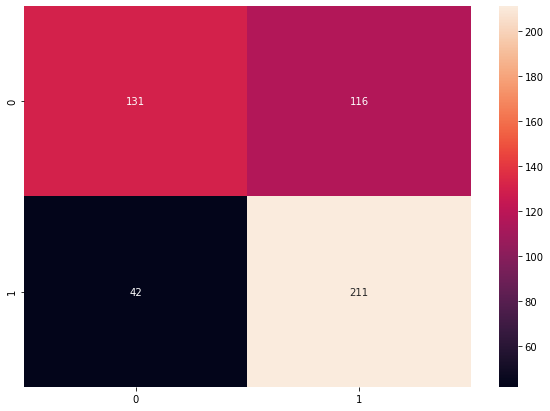

In [19]:
# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))
print("Precsison: %.4f" %precision_score(y_test, y_pred))
print("Recall: %.4f" %recall_score(y_test, y_pred))
print("F1 Score: %.4f" %f1_score(y_test, y_pred))

### Decision tree model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
classifier_dt=DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)
y_pred = classifier_dt.predict(X_test)

In [22]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 500 points : 153


Test Data Accuracy: 0.6940
Precsison: 0.7604
Recall: 0.5771
F1 Score: 0.6562


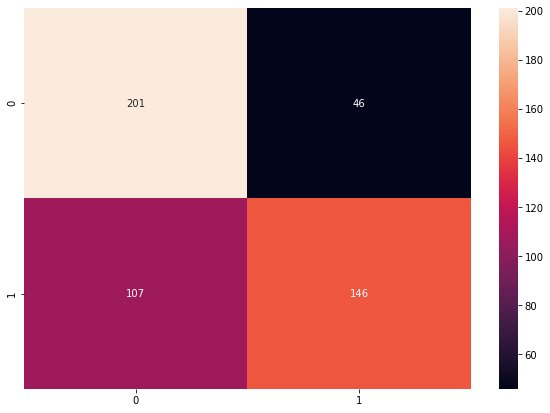

In [23]:
# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))
print("Precsison: %.4f" %precision_score(y_test, y_pred))
print("Recall: %.4f" %recall_score(y_test, y_pred))
print("F1 Score: %.4f" %f1_score(y_test, y_pred))

### Random forest 

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train, y_train)
y_pred = classifier_dt.predict(X_test)

In [26]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 500 points : 153


Test Data Accuracy: 0.6940
Precsison: 0.7604
Recall: 0.5771
F1 Score: 0.6562


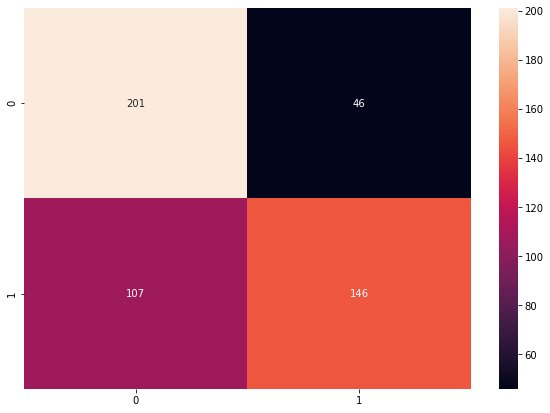

In [27]:
# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))
print("Precsison: %.4f" %precision_score(y_test, y_pred))
print("Recall: %.4f" %recall_score(y_test, y_pred))
print("F1 Score: %.4f" %f1_score(y_test, y_pred))

### Support Vector Machine SVM Model

In [28]:
from sklearn import svm
classifier_svm = svm.SVC()
classifier_svm.fit(X_train, y_train)
y_pred = classifier_dt.predict(X_test)

Test Data Accuracy: 0.6940
Precsison: 0.7604
Recall: 0.5771
F1 Score: 0.6562


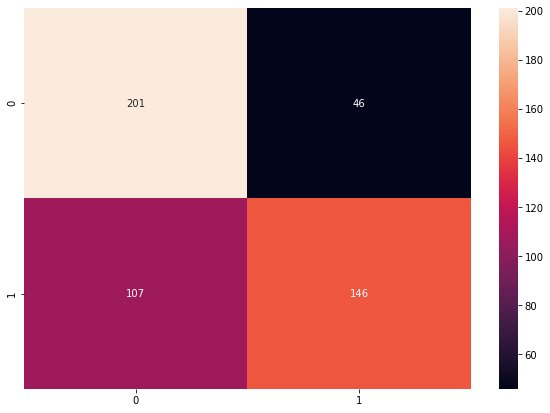

In [29]:
# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))
print("Precsison: %.4f" %precision_score(y_test, y_pred))
print("Recall: %.4f" %recall_score(y_test, y_pred))
print("F1 Score: %.4f" %f1_score(y_test, y_pred))

* Naive Bayes Model achieved best performance with F1 Score: 0.7276

# Trying TF-IDF approach

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [31]:
corpus = vectorizer.fit_transform(corpus).toarray()

In [32]:
X =corpus

In [37]:
X.shape

(1000, 179)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier=GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred = classifier.predict(X_test)

Test Data Accuracy: 0.6950
Precsison: 0.7048
Recall: 0.7115
F1 Score: 0.7081


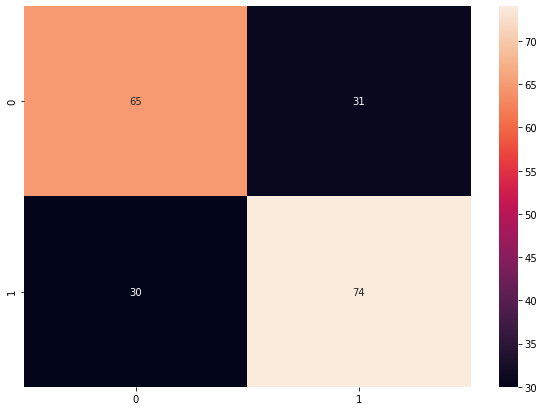

In [40]:
# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))
print("Precsison: %.4f" %precision_score(y_test, y_pred))
print("Recall: %.4f" %recall_score(y_test, y_pred))
print("F1 Score: %.4f" %f1_score(y_test, y_pred))

Naive Bayes Model achieved best performance compared to other models

- Test Data Accuracy: 0.6840
- Precsison: 0.6453
- Recall: 0.8340
- F1 Score: 0.7276